In [1]:
import numpy as np
import json
from PIL import Image
from transition_image import load_png, load_pil_png, target_files
from itertools import groupby
from operator import itemgetter, attrgetter
from collections import defaultdict
import flatland_data_processing as fdp
import pandas as pd

In [2]:
def load(filename):
    with open(filename) as json_file_:
        data = json.load(json_file_)
    return data

def load_level_data(test, level):
    level_path = "static/levelData/"
    level_name = "-Test_%d_Level_%d.json" % (test, level)
    return load("%sOR%s" % (level_path, level_name)), load("%sRL%s" % (level_path, level_name))

data1, data2 = load_level_data(4, 0)

#&&

print(fdp.get_groups(fdp.agents(data1)))
print(fdp.get_groups(fdp.agents(data2)))
grid = np.vstack(data1["environmentData"]["grid"])
grid2 = np.vstack(data2["environmentData"]["grid"])

{'src': [(14, 5), (15, 16), (16, 5)], 'dest': [(15, 5), (16, 16)], 'src-dest': [(14, 5, 16, 16), (15, 16, 15, 5), (16, 5, 16, 16)]}
{'src': [(14, 5), (15, 16), (16, 5)], 'dest': [(15, 5), (16, 16)], 'src-dest': [(14, 5, 16, 16), (15, 16, 15, 5), (16, 5, 16, 16)]}


In [21]:
episode = np.array(data1["environmentData"]["episode"])[:, :, :2]
episode_per_timestep = {}
for timestep in range(episode.shape[0]):
    episode_per_timestep[timestep] = [{"x": int(agent[1]), "y": int(agent[0]), "id": index} for index, agent in
                                   enumerate(episode[timestep])]

In [22]:
episode_per_timestep

{0: [{'x': 5, 'y': 16, 'id': 0},
  {'x': 0, 'y': 0, 'id': 1},
  {'x': 0, 'y': 0, 'id': 2},
  {'x': 16, 'y': 15, 'id': 3},
  {'x': 5, 'y': 14, 'id': 4}],
 1: [{'x': 6, 'y': 16, 'id': 0},
  {'x': 0, 'y': 0, 'id': 1},
  {'x': 5, 'y': 16, 'id': 2},
  {'x': 17, 'y': 15, 'id': 3},
  {'x': 6, 'y': 14, 'id': 4}],
 2: [{'x': 6, 'y': 15, 'id': 0},
  {'x': 5, 'y': 14, 'id': 1},
  {'x': 4, 'y': 16, 'id': 2},
  {'x': 18, 'y': 15, 'id': 3},
  {'x': 7, 'y': 14, 'id': 4}],
 3: [{'x': 7, 'y': 15, 'id': 0},
  {'x': 4, 'y': 14, 'id': 1},
  {'x': 4, 'y': 15, 'id': 2},
  {'x': 18, 'y': 16, 'id': 3},
  {'x': 7, 'y': 14, 'id': 4}],
 4: [{'x': 8, 'y': 15, 'id': 0},
  {'x': 3, 'y': 14, 'id': 1},
  {'x': 3, 'y': 15, 'id': 2},
  {'x': 19, 'y': 16, 'id': 3},
  {'x': 7, 'y': 15, 'id': 4}],
 5: [{'x': 9, 'y': 15, 'id': 0},
  {'x': 3, 'y': 14, 'id': 1},
  {'x': 2, 'y': 15, 'id': 2},
  {'x': 20, 'y': 16, 'id': 3},
  {'x': 8, 'y': 15, 'id': 4}],
 6: [{'x': 10, 'y': 15, 'id': 0},
  {'x': 3, 'y': 15, 'id': 1},
  {'x': 1

In [3]:
data = load("static/levelData/OR-Test_7_Level_0.json")

In [124]:
fdp.episode_per_agent(data2)[2]

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [16, 5],
 [16, 4],
 [15, 4],
 [15, 4],
 [15, 4],
 [15, 3],
 [15, 2],
 [15, 1],
 [15, 1],
 [15, 0],
 [16, 0],
 [17, 0],
 [18, 0],
 [19, 0],
 [19, 1],
 [19, 2],
 [19, 3],
 [19, 4],
 [19, 5],
 [19, 6],
 [19, 7],
 [19, 8],
 [19, 9],
 [19, 9],
 [19, 10],
 [19, 11],
 [19, 11],
 [18, 11],
 [17, 11],
 [16, 11],
 [15, 11],
 [15, 12],
 [15, 13],
 [16, 13],
 [16, 14],
 [16, 15],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [ ]:
def episode_per_agent(level_data):
    episode_ = np.array(level_data["environmentData"]["episode"])
    hist_per_agent = {}
    for agent in range(episode_.shape[1]):
        hist_per_agent[agent] = np.flip(episode_[:, agent, :2], -1).tolist()
    return hist_per_agent

In [95]:
from collections import Counter
def heatmap_dif(heatmap1, heatmap2):
    heatmap1 = heatmap1.flatten()
    heatmap2 = heatmap2.flatten()
    result = []
    for index, (val1, val2) in enumerate(zip(heatmap1, heatmap2)):
        c = Counter(val1)
        c.subtract(val2)
        result.append({k: v for k, v in dict(c).items() if v != 0})
    return np.array(result)

In [96]:
heatmap_or = np.array(fdp.heatmap_data(data1))
heatmap_rl = np.array(fdp.heatmap_data(data2))
heatmap_ = heatmap_dif(heatmap_or, heatmap_rl)
heatmap_or = heatmap_or.flatten()
heatmap_rl = heatmap_rl.flatten()

In [118]:
foo = np.vstack([heatmap_or, heatmap_rl, heatmap_]).swapaxes(0, 1)

In [119]:
index = 0
print(foo[index][0] == heatmap_or[index])
print(foo[index][1] == heatmap_rl[index])
print(foo[index][2] == heatmap_[index])
print(foo[index][1], heatmap_rl[index])

True
True
True
{'src-16-5': 111, 'dest-16-16': 163, 'src-dest-16-5-16-16': 111, 'src-14-5': 52, 'src-dest-14-5-16-16': 52, 'src-15-16': 44, 'dest-15-5': 44, 'src-dest-15-16-15-5': 44} {'src-16-5': 111, 'dest-16-16': 163, 'src-dest-16-5-16-16': 111, 'src-14-5': 52, 'src-dest-14-5-16-16': 52, 'src-15-16': 44, 'dest-15-5': 44, 'src-dest-15-16-15-5': 44}


In [117]:
foo.swapaxes(0, 1).shape

(625, 3)

In [ ]:
foo = episode_per_agent(data)
bar = {}
for agent, hist in foo.items():
    coord = []
    distance = -1
    last_pos = [0, 0]
    for i, pos in enumerate(hist):
        if pos != last_pos:
            distance = distance + 1
        if pos != [0, 0]:
            coord.append([i, distance])
        last_pos = pos
    bar[agent] = coord

In [25]:
bar[7]

[[0, 0],
 [1, 1],
 [2, 2],
 [3, 3],
 [4, 3],
 [5, 3],
 [6, 4],
 [7, 5],
 [8, 6],
 [9, 7],
 [10, 8],
 [11, 9],
 [12, 10],
 [13, 11],
 [14, 12],
 [15, 13]]

In [5]:
foo

{0: [[0, 0],
  [0, 0],
  [12, 17],
  [12, 16],
  [13, 16],
  [13, 15],
  [13, 14],
  [13, 13],
  [13, 12],
  [13, 11],
  [13, 10],
  [13, 9],
  [14, 9],
  [14, 8],
  [14, 7],
  [15, 7],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 1: [[14, 6],
  [14, 7],
  [14, 8],
  [14, 9],
  [14, 10],
  [14, 11],
  [14, 12],
  [14, 13],
  [14, 14],
  [14, 15],
  [13, 15],
  [13, 16],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 2: [[12, 17],
  [12, 16],
  [13, 16],
  [13, 15],
  [13, 14],
  [13, 13],
  [13, 12],
  [13, 11],
  [13, 10],
  [13, 9],
  [13, 8],
  [13, 7],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0,

In [5]:


def agent_start_end(agent_episode):
    start = -1
    for i, (pos1, pos2) in enumerate(agent_episode):
        if pos1 != 0 and pos2 != 0 and start == -1:
            start = i
        elif pos1 == 0 and pos2 == 0 and start != -1:
            return start, i - 1
    return start, len(agent_episode) - 1

def agents(level_data):
    epi_agent = episode_per_agent(level_data)
    agents_ = []
    for agent in level_data["environmentData"]["agents"]:
        agent_start, agent_end = agent_start_end(epi_agent[agent["agent_index"]])
        agents_.append({# "src": agent["initial_position"], "dest": agent["target"],
                        "index": agent["agent_index"],
                        "src_x": agent["initial_position"][0], "src_y": agent["initial_position"][1],
                        "dest_x": agent["target"][0], "dest_y": agent["target"][1],
                        "start_t": agent_start, "end_t": agent_end})
    keys = [("src", itemgetter("src_x", "src_y")),
            ("dest", itemgetter("dest_x", "dest_y")),
            ("src-dest", itemgetter("src_x", "src_y", "dest_x", "dest_y"))]
    for index_name, key in keys:
        for _, group in groupby(sorted(agents_, key=key), key=key):
            for i, agent in enumerate(sorted(group, key=itemgetter("start_t"))):
                agent["%s-index" % index_name] = i
    return sorted(agents_, key=lambda x: x["index"])

def group_agents(by, agents_):
    if not (by == "src" or by == "dest" or by == "src dest"):
        raise RuntimeError("by must be src or dest or 'src dest'")
    if by == "src dest":
        key = itemgetter("src_x", "src_y", "dest_x", "dest_y")
    else:
        key = itemgetter("%s_x" % by, "%s_y" % by)
    groups = []
    for key, group in groupby(sorted(agents_, key=key), key=key):
        groups.append((key, list(group)))
    return groups


def heatmap_data(level_data):
    agents_ = agents(level_data)
    epi_agent = episode_per_agent(level_data)
    grid = np.array(level_data["environmentData"]["grid"])
    heatmap = [[{} for j in range(grid.shape[0])] for i in range(grid.shape[1])]
    for agent_index, agent_episode in epi_agent.items():
        for (pos1, pos2) in agent_episode:
            values = [agents_[agent_index]["src_x"], agents_[agent_index]["src_y"],
                      agents_[agent_index]["dest_x"], agents_[agent_index]["dest_y"]]
            keys = ["src-%d-%d" % (values[0], values[1]),
                    "dest-%d-%d"% (values[2], values[3]),
                    "src-dest-%d-%d-%d-%d" % (values[0], values[1], values[2], values[3])]
            for key in keys:
                if key in heatmap[pos1][pos2]:
                    heatmap[pos1][pos2][key] += 1
                else:
                    heatmap[pos1][pos2][key] = 1
    return heatmap


def heatmap_combine(heatmap_data1, heatmap_data2):
    result = [[{} for _ in range(len(heatmap_data1[0]))] for _ in range(len(heatmap_data1))]
    for i, (row_lhs, row_rhs) in enumerate(zip(heatmap_data1, heatmap_data2)):
        for j, (cell_lhs, cell_rhs) in enumerate(zip(row_lhs, row_rhs)):
            result[i][j] = {"lhs": cell_lhs, "rhs": cell_rhs}
    return result

heatmap_combine(heatmap_data(data1), heatmap_data(data2))

[[{'lhs': {'src-16-5': 28,
    'dest-16-16': 53,
    'src-dest-16-5-16-16': 28,
    'src-14-5': 25,
    'src-dest-14-5-16-16': 25,
    'src-15-16': 5,
    'dest-15-5': 5,
    'src-dest-15-16-15-5': 5},
   'rhs': {'src-16-5': 111,
    'dest-16-16': 163,
    'src-dest-16-5-16-16': 111,
    'src-14-5': 52,
    'src-dest-14-5-16-16': 52,
    'src-15-16': 44,
    'dest-15-5': 44,
    'src-dest-15-16-15-5': 44}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rhs': {}},
  {'lhs': {}, 'rh

In [115]:
agents_ = agents(data1)


agents_
def get_grps(agents):
    keys = [("src", itemgetter("src_x", "src_y")),
            ("dest", itemgetter("dest_x", "dest_y")),
            ("src-dest", itemgetter("src_x", "src_y", "dest_x", "dest_y"))]
    groups = {"src": [], "dest": [], "src-dest": []}
    for index_name, key in keys:
        for group_key, group in groupby(sorted(agents, key=key), key=key):
            groups[index_name].append(group_key)
    return groups

{'src': [(14, 5), (15, 16), (16, 5)],
 'dest': [(15, 5), (16, 16)],
 'src-dest': [(14, 5, 16, 16), (15, 16, 15, 5), (16, 5, 16, 16)]}

In [4]:
# trains on target
# total time to completion
# average starttime
# average number of stops
# variance of stops
# average time to completion
# variance of time to completion

def start_time(episode_data):
    return next(i for i, pos in enumerate(episode_data) if pos != [0, 0])

def finish_time(episode_data):
    if episode_data[-1] != [0, 0]:
        return -1
    return next(i for i, pos in reversed(list(enumerate(episode_data))) if pos != [0, 0]) + 1

def number_of_stops(episode_data):
    travel_episode = [pos for pos in episode_data if pos != [0, 0]]
    current_pos = [0, 0]
    stops = 0
    for pos in travel_episode:
        if current_pos == pos:
            stops += 1
        current_pos = pos
    return stops

def traveled_distance(episode_data):
    travel_episode = [pos for pos in episode_data if pos != [0, 0]]
    current_pos = [0, 0]
    distance = 0
    for pos in travel_episode:
        if current_pos != pos:
            distance += 1
        current_pos = pos
    return distance

def get_metrics(episode_per_agent):
    result = {"n_finished": len([finish_time(v) for k, v in episode_per_agent.items() if finish_time(v) != -1]),
              "total_time": max([finish_time(v) for k, v in episode_per_agent.items()]),
              "mean_start_time": np.mean([start_time(v) for k, v in episode_per_agent.items()]),
              "std_start_time": np.std([start_time(v) for k, v in episode_per_agent.items()]),
              "mean_finish_time": np.mean([finish_time(v) for k, v in episode_per_agent.items() if finish_time(v) != -1]),
              "std_finish_time": np.std([finish_time(v) for k, v in episode_per_agent.items() if finish_time(v) != -1]),
              "mean_stops": np.mean([number_of_stops(v) for k, v in episode_per_agent.items()]),
              "max_stops": max([number_of_stops(v) for k, v in episode_per_agent.items()]),
              "mean_distance": np.mean([traveled_distance(v) for k, v in episode_per_agent.items()])}
    return result

print(get_metrics(fdp.episode_per_agent(data2)))
get_metrics(fdp.episode_per_agent(data1))

{'n_finished': 5, 'total_time': 79, 'mean_start_time': 12.0, 'std_start_time': 16.334013591276335, 'mean_finish_time': 50.6, 'std_finish_time': 22.94863830382971, 'mean_stops': 7.6, 'max_stops': 21, 'mean_distance': 31.0}


{'n_finished': 5,
 'total_time': 35,
 'mean_start_time': 0.6,
 'std_start_time': 0.7999999999999999,
 'mean_finish_time': 25.0,
 'std_finish_time': 9.486832980505138,
 'mean_stops': 0.6,
 'max_stops': 2,
 'mean_distance': 23.8}

In [57]:
[traveled_distance(v) for k, v in foo.items()]

[13, 31, 31, 35, 45]

In [58]:
[finish_time(v) - start_time(v) for k, v in foo.items()]

[13, 42, 36, 36, 66]

In [59]:
[number_of_stops(v) for k, v in foo.items()]

[0, 11, 5, 1, 21]

In [5]:
foo = get_metrics(fdp.episode_per_agent(data1))
foo2 = get_metrics(fdp.episode_per_agent(data2))

In [6]:
output = pd.DataFrame()
output = output.append(foo, ignore_index=True)
output = output.append(foo2, ignore_index=True)
output = output.reset_index()
output.head()

,index,max_stops,mean_distance,mean_finish_time,mean_start_time,mean_stops,n_finished,std_finish_time,std_start_time,total_time
0,0,2.0,23.8,25.0,0.6,0.6,5.0,9.486833,0.800000,35.0
1,1,21.0,31.0,50.6,12.0,7.6,5.0,22.948638,16.334014,79.0


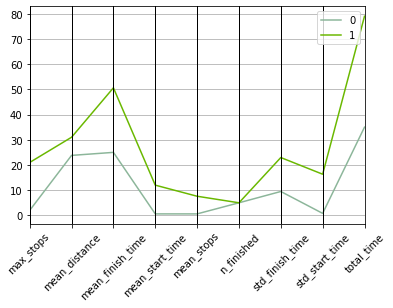

In [14]:
import matplotlib.pyplot as plt
ax = pd.plotting.parallel_coordinates(output, "index")
plt.xticks(rotation=45)
fig = ax.get_figure()
fig.savefig("pp.png", bbox_inches="tight")

In [117]:
def analyse_episode(episode_data):
    steps = []
    travel_episode = [i for i, pos in enumerate(episode_data) if pos != [0, 0]]
    start = travel_episode[0]
    current_pos = [0, 0]
    moving = True
    for i in travel_episode:
        if current_pos == episode_data[i]:
            if moving:
                moving = False
                steps.append([start, i - 1])
        if current_pos != episode_data[i]:
            if not moving:
                start = i
                moving = True
        current_pos = episode_data[i]
    if moving:
        steps.append([start, travel_episode[-1]])
    return steps

def time_data_per_grp(level_data):
    episode_per_agent = fdp.episode_per_agent(data1)
    agents = fdp.agents(data1)
    groups = fdp.get_groups(agents)
    time_data = {}
    for (x, y) in groups["src"]:
        agents_in_group = [agent["index"] for agent in agents if agent["src_x"] == x and agent["src_y"] == y]
        obj = {"agent_index": agents_in_group}
        for agent in agents_in_group:
            obj[str(agent)] = analyse_episode(episode_per_agent[agent])
        time_data["src-%d-%d" % (x, y)] = obj
    return time_data

In [3]:
fdp.time_data_per_grp(data1)

{'src-14-5': {'agent_index': [1, 4],
  1: [[2, 4], [6, 22], [24, 34]],
  4: [[0, 2], [4, 13]]},
 'src-15-16': {'agent_index': [3], 3: [[0, 30]]},
 'src-16-5': {'agent_index': [0, 2], 0: [[0, 12]], 2: [[1, 31]]}}